In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#Importing the dataframe

df = pd.read_csv("df_cleaned")

#Importing and cleaning the weather data

weather_df = pd.read_csv("feature_data/weather.csv")

weather_df = weather_df.drop(columns=["dt","timezone","city_name","lat","lon","sea_level","grnd_level","weather_icon","rain_3h","snow_3h"])

weather_df = weather_df.rename(columns={"dt_iso":"ds"})



In [3]:
#Analyzing the columns
weather_df["weather_description"].value_counts()

sky is clear                    24678
broken clouds                    8959
light rain                       6884
few clouds                       4072
scattered clouds                 2722
mist                             2316
fog                              1211
light intensity drizzle          1047
overcast clouds                   867
moderate rain                     851
light intensity shower rain       795
light snow                        655
light intensity drizzle rain      617
shower rain                       120
snow                              100
heavy intensity rain               77
proximity thunderstorm             60
proximity shower rain              48
thunderstorm with rain             42
light rain and snow                36
light shower snow                  29
drizzle                            18
thunderstorm                       17
thunderstorm with light rain       15
haze                                7
rain and drizzle                    7
thunderstorm

In [4]:
# Formatting the date column
weather_df['ds'] = weather_df['ds'].str[:19]

# Convert to datetime format
weather_df["ds"] = pd.to_datetime(weather_df["ds"])

# Drop all rows where the time component of 'column1' is not 12:00:00
weather_df = weather_df[weather_df['ds'].dt.time == pd.to_datetime('12:00:00').time()]

In [9]:
# Dropping the time
weather_df["ds"] = pd.to_datetime(weather_df["ds"].dt.date)

In [10]:
# Formatting ds into date format for merging
df['ds'] = pd.to_datetime(df['ds'])

In [13]:
#Merging weather data on our revenue data

merged_df = pd.merge(df,weather_df,on="ds",how="left")
merged_df.head()

,ds,y,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description
0,2016-09-01,365.9,25.90,10000.0,9.28,25.46,25.63,26.03,1019,35,6.70,270,NaN,NaN,NaN,0,800,Clear,sky is clear
1,2016-09-02,358.6,22.18,9999.0,10.02,21.65,21.92,23.96,1020,46,4.63,280,NaN,NaN,NaN,75,803,Clouds,broken clouds
2,2016-09-03,487.5,24.94,9999.0,10.79,24.56,24.92,25.03,1016,41,6.70,270,NaN,NaN,NaN,40,802,Clouds,scattered clouds
3,2016-09-04,90.9,19.94,9999.0,14.96,19.90,19.01,19.96,1010,73,6.70,230,NaN,NaN,NaN,75,500,Rain,light rain
4,2016-09-05,125.0,19.94,9999.0,14.96,19.90,19.01,19.96,1014,73,4.63,320,NaN,0.21,NaN,40,500,Rain,light rain


In [23]:
merged_df["weather_description"].value_counts()

sky is clear                    674
light rain                      259
broken clouds                   257
few clouds                      180
scattered clouds                177
light intensity shower rain      42
moderate rain                    27
mist                             25
overcast clouds                  22
light intensity drizzle          19
light intensity drizzle rain     17
light snow                       11
shower rain                       6
proximity shower rain             4
proximity thunderstorm            3
heavy intensity rain              3
thunderstorm                      3
fog                               2
snow                              1
thunderstorm with light rain      1
Name: weather_description, dtype: int64

In [25]:
merged_df = merged_df.drop(columns=["snow_1h"])

In [26]:
corr = merged_df.corr()

/tmp/ipykernel_1178/400310794.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


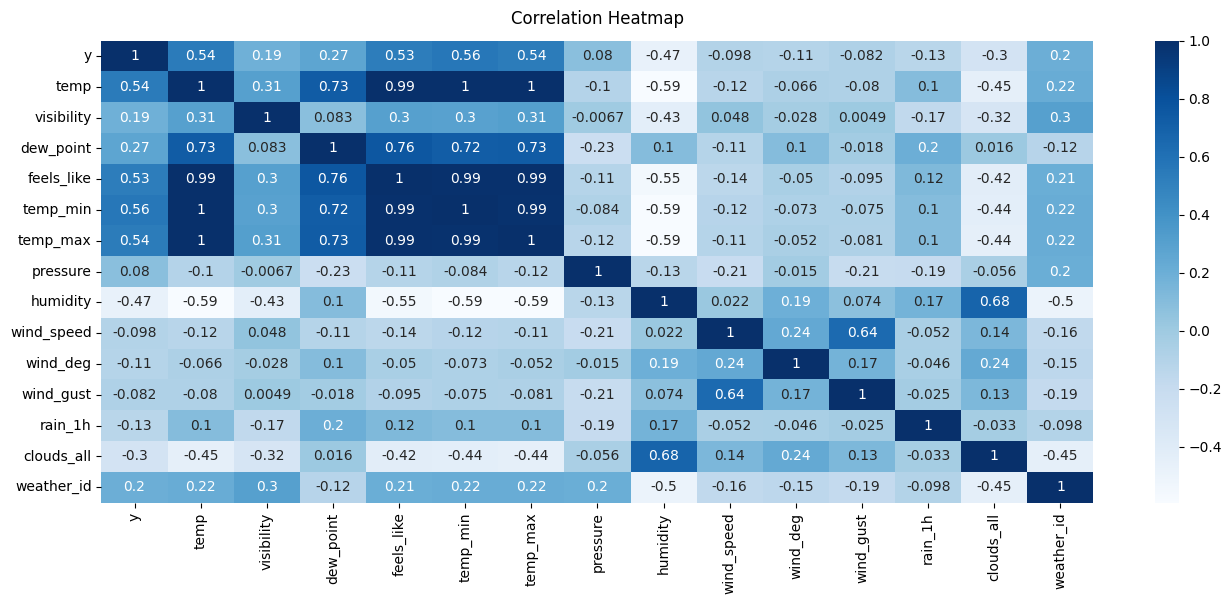

In [28]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(corr, cmap="Blues", annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

plt.show()

In [29]:
corr["y"].sort_values(ascending=False)

y             1.000000
temp_min      0.558364
temp          0.544018
temp_max      0.535083
feels_like    0.529440
dew_point     0.268668
weather_id    0.201071
visibility    0.185681
pressure      0.079801
wind_gust    -0.082273
wind_speed   -0.097789
wind_deg     -0.108512
rain_1h      -0.130969
clouds_all   -0.296877
humidity     -0.472880
Name: y, dtype: float64